**Data Preparation and Preprocessing (5%)**
 • Load the dataset and handle missing values (imputation, removal, etc.).
 • Perform exploratory data analysis (EDA) to understand feature distribu
tions and class imbalance.
 • Normalize or standardize features where necessary.
 • Encode categorical variables properly (e.g., one-hot encoding or label en
coding). v Split the dataset into training and testing sets

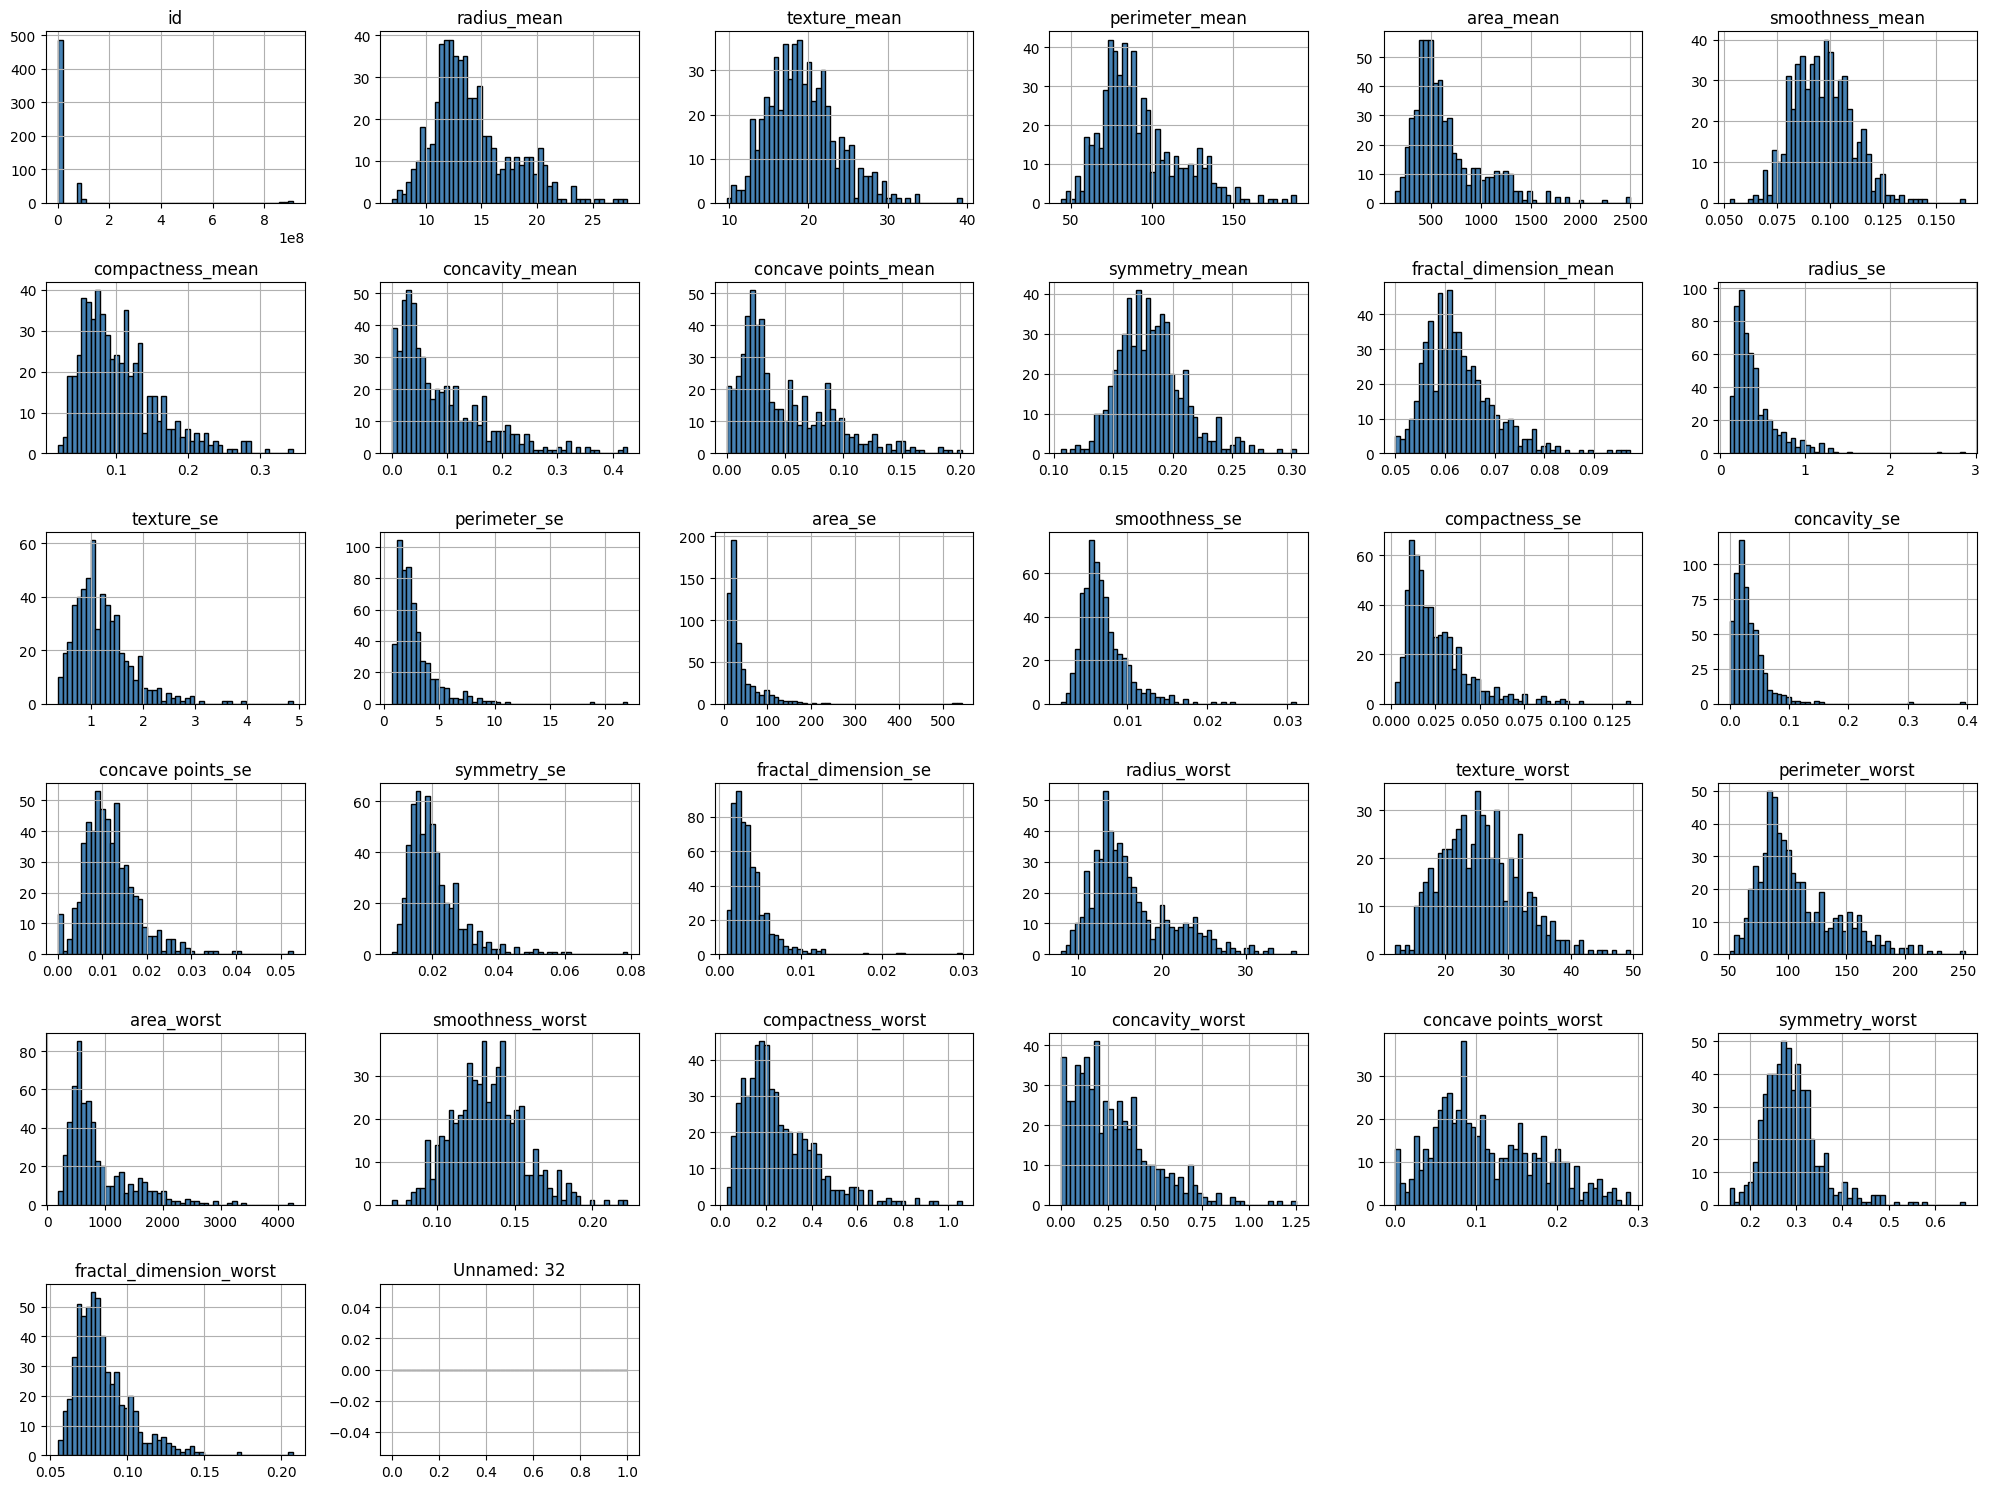

<ipython-input-2-eeb01899e542>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette='coolwarm')


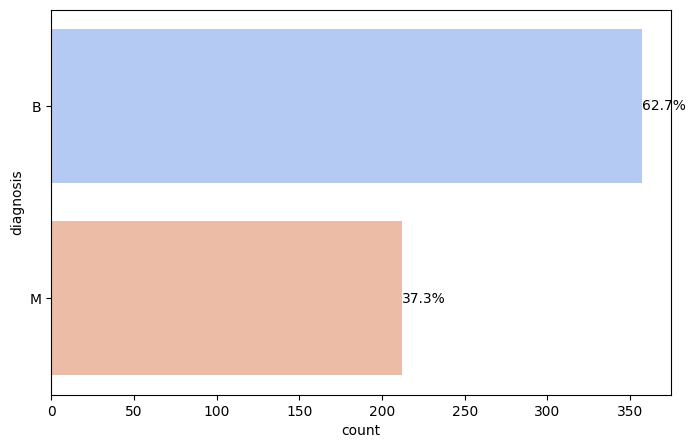

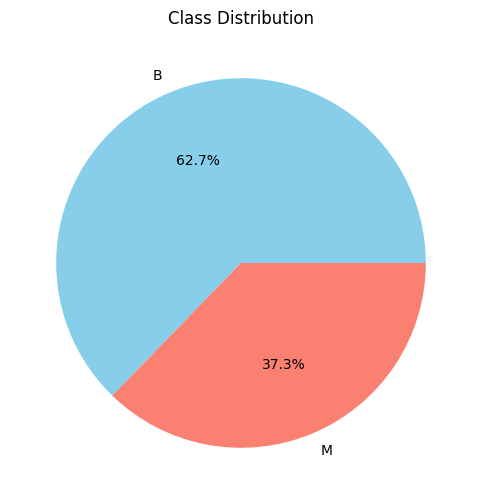

Class Imbalance Ratio: 1.68
Training set size: (455, 32), Testing set size: (114, 32)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

data = pd.read_csv('data.csv')

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())

for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

data.hist(bins=50, figsize=(20, 15), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()

for column in data.select_dtypes(include='object').columns:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette='coolwarm')
    total = len(data[column])
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        ax.annotate(percentage, (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')
    plt.show()

plt.figure(figsize=(6,6))
data['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.ylabel('')
plt.title('Class Distribution')
plt.show()

class_counts = data['diagnosis'].value_counts()
imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[1]
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}")

scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference(['diagnosis'])
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


**1.2 Implement Classification Models (20%)**
 Implement the following models using ‘scikit-learn‘:
 • Logistic Regression (with and without L1/L2 regularization)
 • K-Nearest Neighbors (KNN)
 • Support Vector Machine (SVM) (with different kernels: linear, RBF, poly
nomial)
 • Decision Tree Classifier (analyze depth and pruning effects)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Logistic Regression (No Regularization):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Logistic Regression (L2 Regularization):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Logistic Regression (L1 Regularization):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   ma

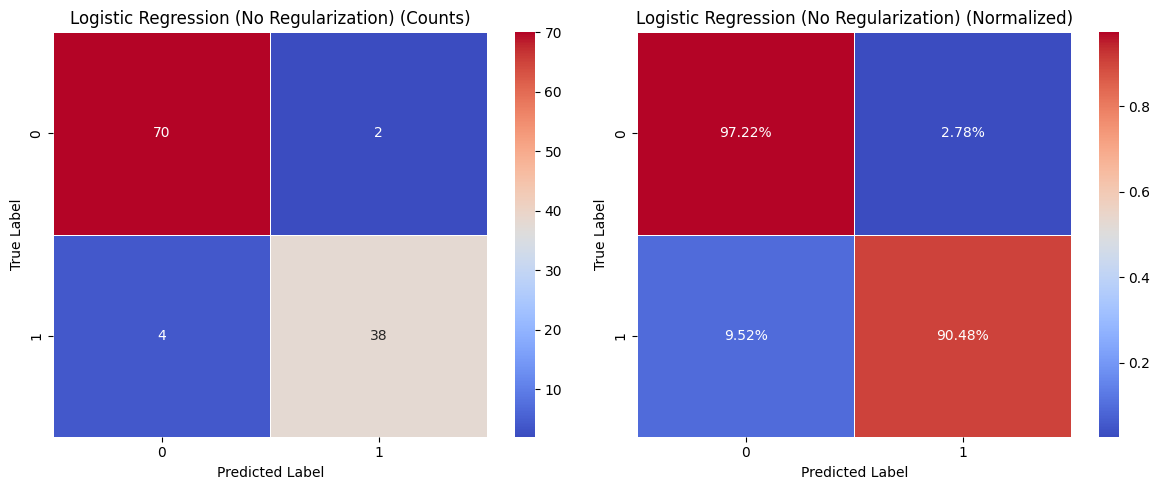

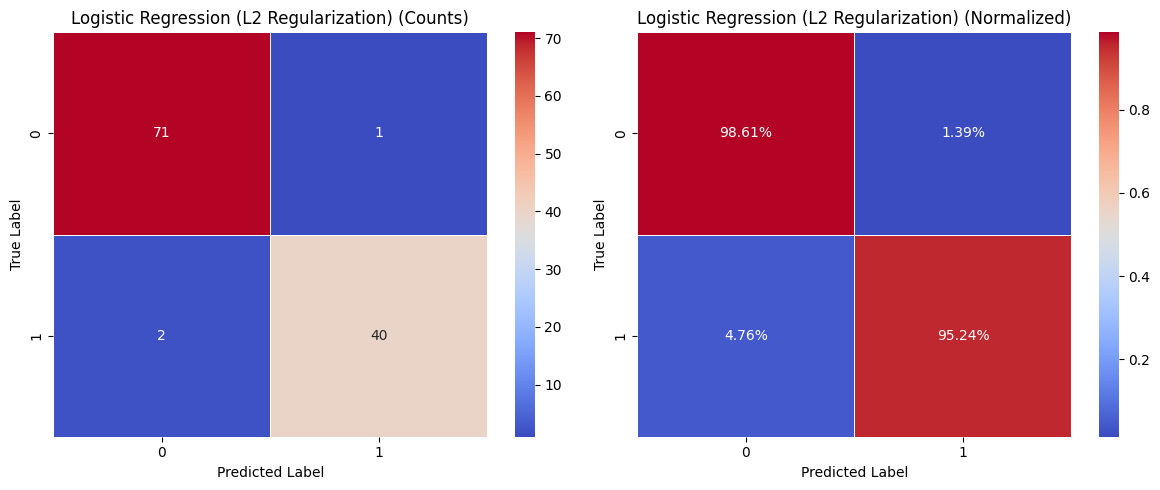

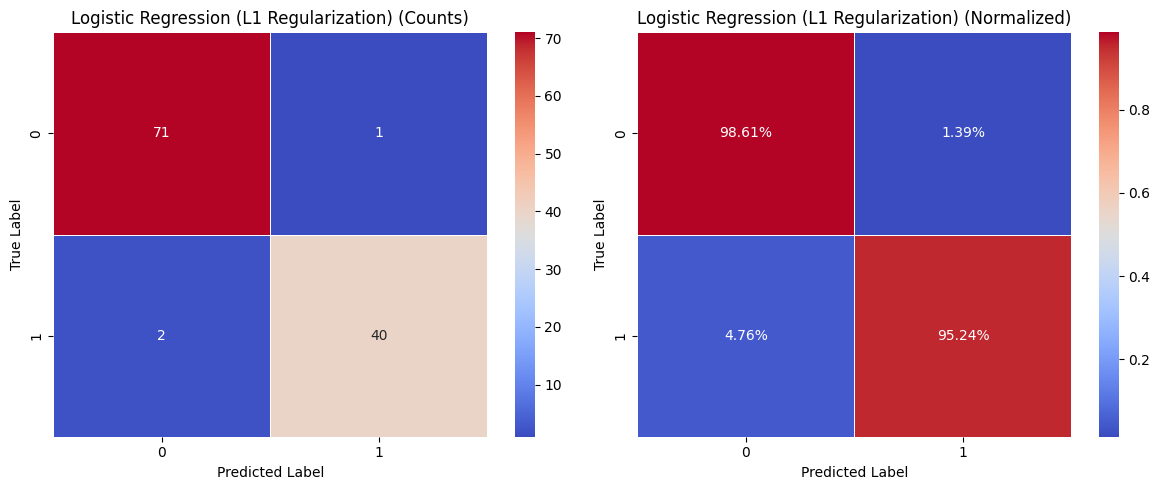

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

logreg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
logreg.fit(X_train_imputed, y_train)
y_pred_logreg = logreg.predict(X_test_imputed)

print("Logistic Regression (No Regularization):")
print(classification_report(y_test, y_pred_logreg))

logreg_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000)
logreg_l2.fit(X_train_imputed, y_train)
y_pred_logreg_l2 = logreg_l2.predict(X_test_imputed)

print("Logistic Regression (L2 Regularization):")
print(classification_report(y_test, y_pred_logreg_l2))

logreg_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train_imputed, y_train)
y_pred_logreg_l1 = logreg_l1.predict(X_test_imputed)

print("Logistic Regression (L1 Regularization):")
print(classification_report(y_test, y_pred_logreg_l1))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"{title} (Counts)")
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"{title} (Normalized)")
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression (No Regularization)")
plot_confusion_matrix(y_test, y_pred_logreg_l2, "Logistic Regression (L2 Regularization)")
plot_confusion_matrix(y_test, y_pred_logreg_l1, "Logistic Regression (L1 Regularization)")


The results compare three logistic regression models: without regularization, with L2 (Ridge) regularization, and with L1 (Lasso) regularization. All models demonstrate high accuracy, with the unregularized model achieving 95% and both L1 and L2 regularized models improving slightly to 97%. The precision, recall, and F1-score for both classes are consistently high, but regularized models show a noticeable improvement, particularly in recall, indicating that they better capture positive cases. L2 regularization enhances generalization by reducing variance, while L1 regularization, which can perform feature selection, delivers almost identical performance, suggesting that all features contribute meaningfully. Overall, regularization helps refine predictions and slightly boosts classification performance without any significant drawbacks.

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



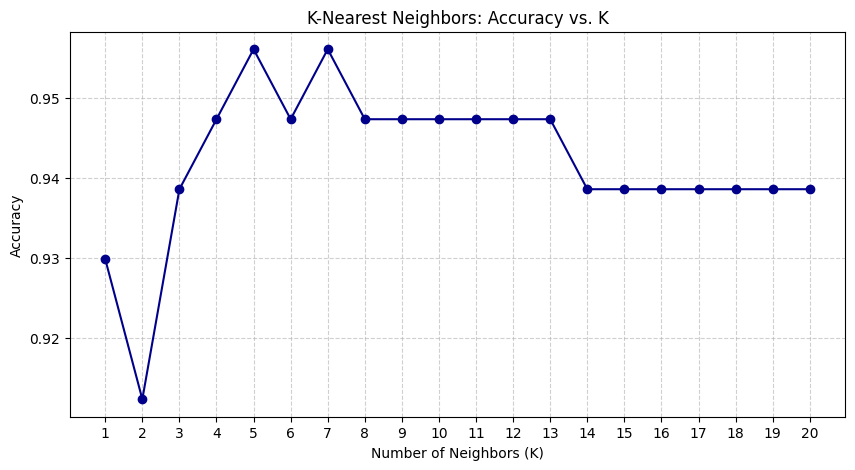

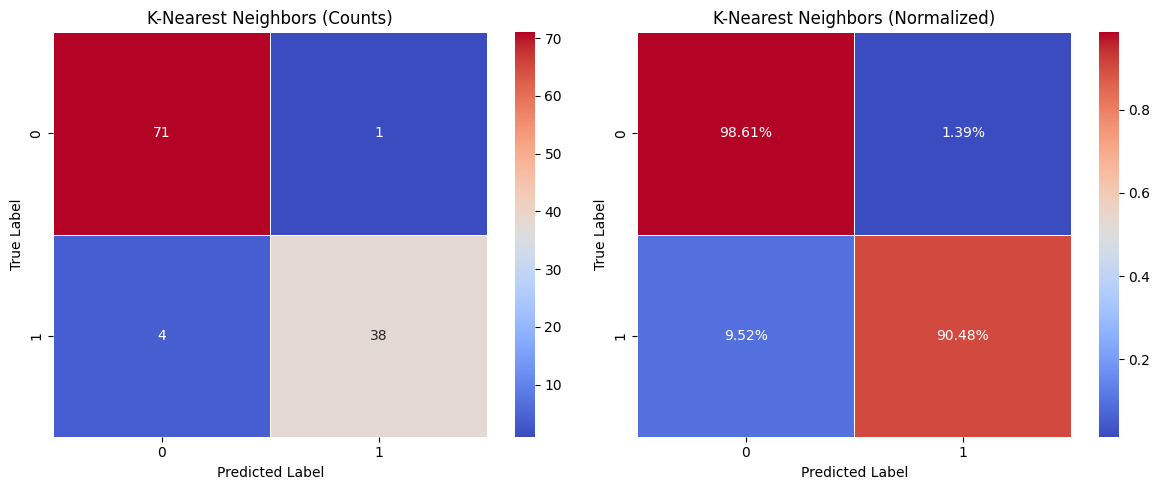

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)
y_pred_knn = knn.predict(X_test_imputed)

print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

accuracy_scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_imputed, y_train)
    y_pred = knn.predict(X_test_imputed)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='darkblue', markersize=6)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("K-Nearest Neighbors: Accuracy vs. K")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"{title} (Counts)")
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"{title} (Normalized)")
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")


The K-Nearest Neighbors (KNN) model achieves a high overall accuracy of 96%, indicating strong classification performance. The precision, recall, and F1-score are consistently high for both classes, with class 0 showing slightly better recall at 99%, meaning almost all negative cases are correctly identified. Meanwhile, class 1 has a recall of 90%, suggesting that some positive cases are misclassified. The balanced performance across precision and recall ensures that the model effectively differentiates between classes while maintaining a low error rate. Overall, KNN performs well, but there might be room for improvement in recall for the positive class, potentially by adjusting hyperparameters like the number of neighbors.

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


SVM (Linear Kernel):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

SVM (RBF Kernel):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

SVM (Polynomial Kernel):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        72
           1       1.00      0.67      0.80        42

    accuracy                           0.88       114
   macro avg       0.92      0.83      0.86       114
weighted a

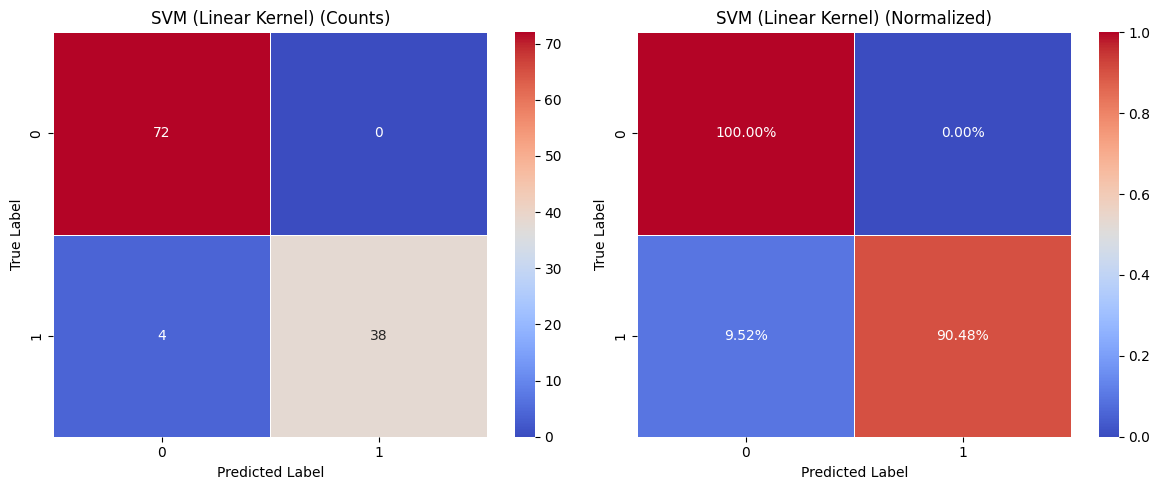

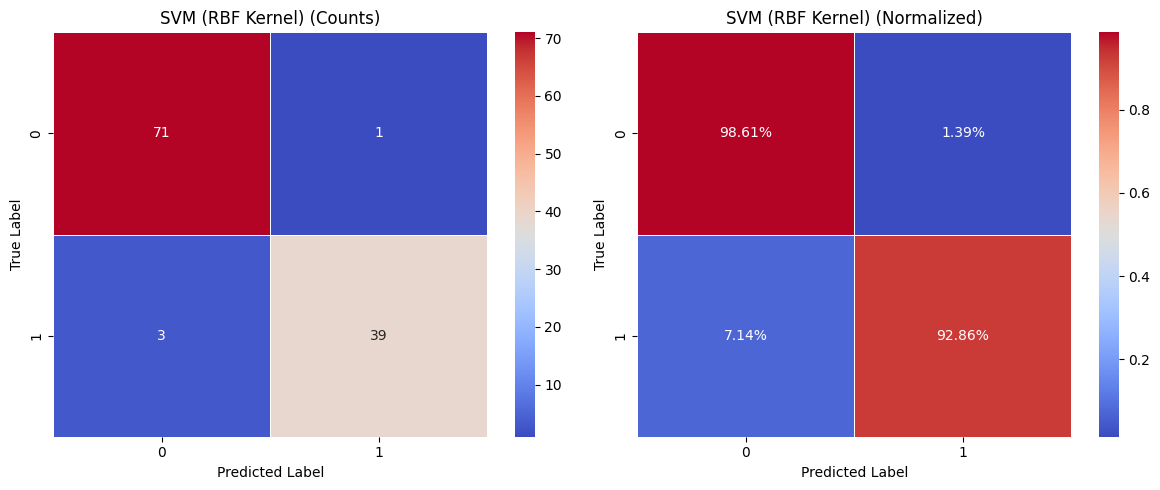

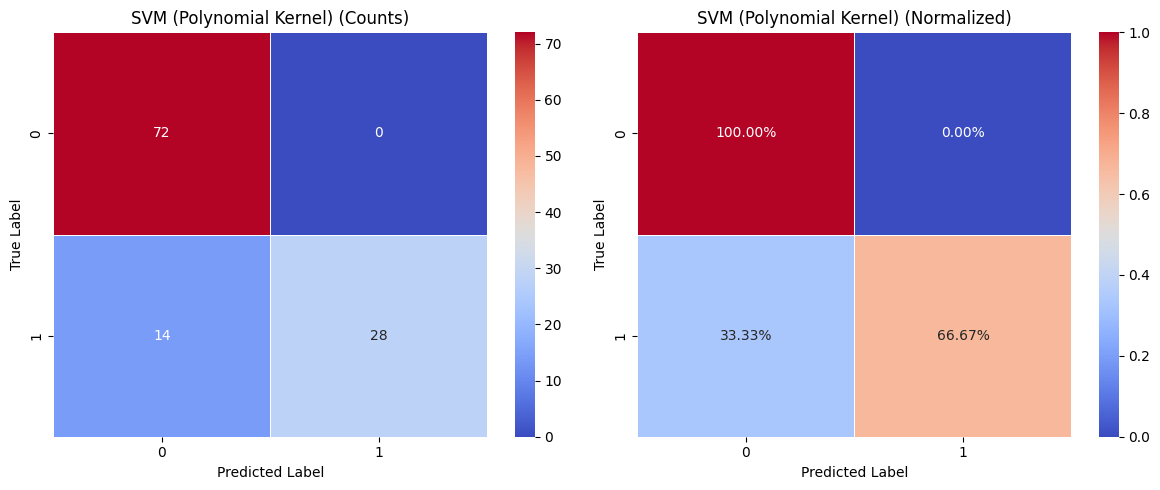

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_imputed, y_train)
y_pred_svm_linear = svm_linear.predict(X_test_imputed)

print("SVM (Linear Kernel):")
print(classification_report(y_test, y_pred_svm_linear))

svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_imputed, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test_imputed)

print("SVM (RBF Kernel):")
print(classification_report(y_test, y_pred_svm_rbf))

svm_poly = SVC(kernel='poly', degree=3, probability=True)
svm_poly.fit(X_train_imputed, y_train)
y_pred_svm_poly = svm_poly.predict(X_test_imputed)

print("SVM (Polynomial Kernel):")
print(classification_report(y_test, y_pred_svm_poly))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"{title} (Counts)")
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"{title} (Normalized)")
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm_linear, "SVM (Linear Kernel)")
plot_confusion_matrix(y_test, y_pred_svm_rbf, "SVM (RBF Kernel)")
plot_confusion_matrix(y_test, y_pred_svm_poly, "SVM (Polynomial Kernel)")


The results compare SVM models with three different kernels: linear, RBF, and polynomial. The linear kernel achieves high accuracy (96%) with perfect recall for class 0 and slightly lower recall (90%) for class 1, indicating that some positive cases are misclassified. The RBF kernel performs similarly, achieving 96% accuracy with balanced precision and recall, making it a strong alternative. However, the polynomial kernel performs significantly worse, with a lower overall accuracy of 88% and much weaker recall for class 1 (67%), meaning it struggles to correctly classify positive cases. This suggests that both the linear and RBF kernels are well-suited for the dataset, while the polynomial kernel may not be a good fit, potentially due to overfitting or an inappropriate degree selection.


Decision Tree (Default Parameters):
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        72
           1       0.88      0.90      0.89        42

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



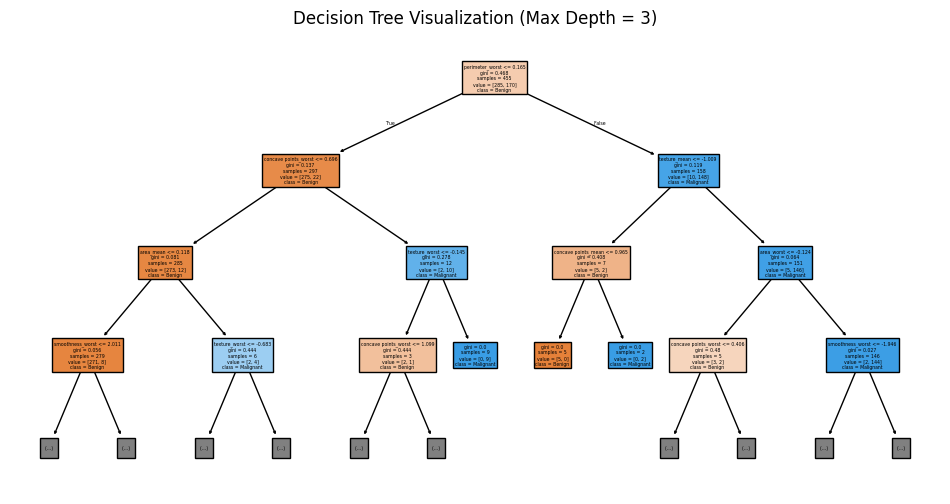

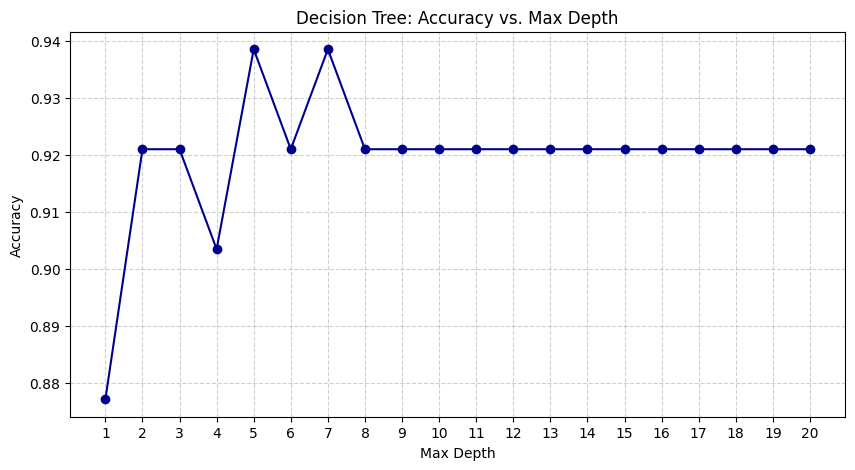

Decision Tree (Pruned):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.88      0.86      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



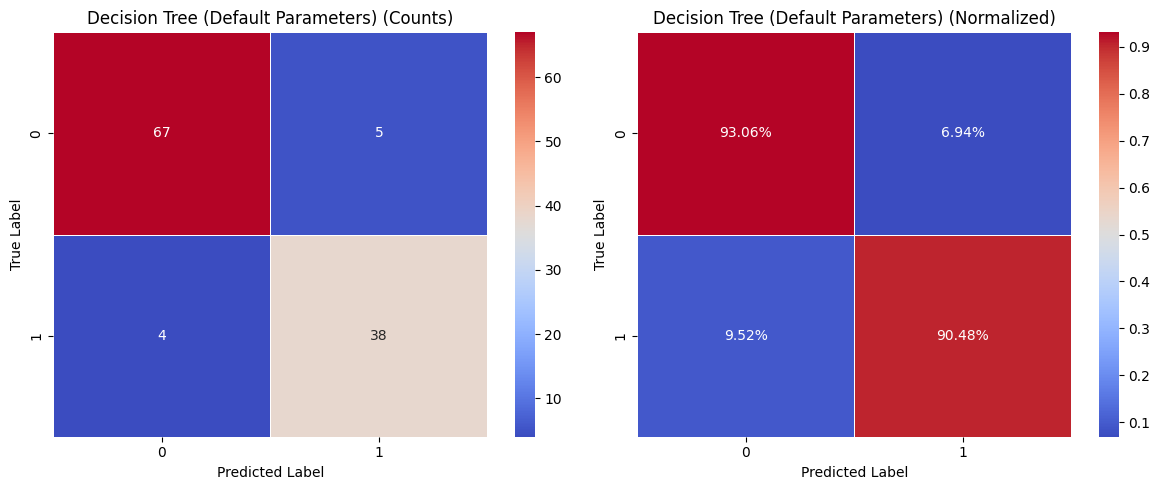

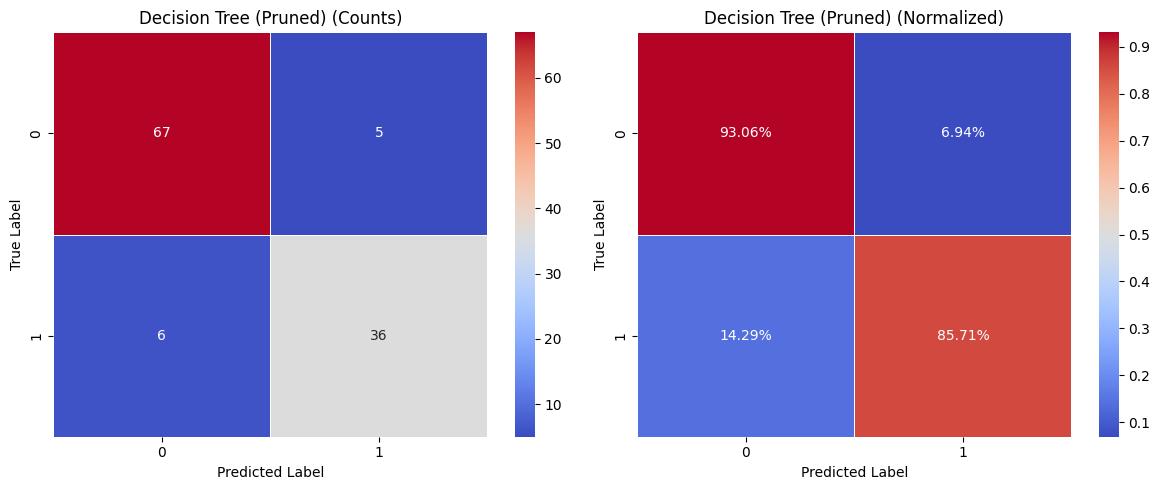

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree (Default Parameters):")
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(12, 6))
tree.plot_tree(dt, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()

accuracy_scores = []
depth_values = range(1, 21)
for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(depth_values, accuracy_scores, marker='o', linestyle='-', color='darkblue', markersize=6)
plt.xticks(depth_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Decision Tree: Accuracy vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

dt_pruned = DecisionTreeClassifier(min_samples_split=10, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_dt_pruned = dt_pruned.predict(X_test)

print("Decision Tree (Pruned):")
print(classification_report(y_test, y_pred_dt_pruned))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"{title} (Counts)")
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"{title} (Normalized)")
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree (Default Parameters)")
plot_confusion_matrix(y_test, y_pred_dt_pruned, "Decision Tree (Pruned)")


The results compare a decision tree with default parameters and a pruned version. The default decision tree achieves 92% accuracy, with slightly better recall for class 1 (90%) compared to the pruned tree (86%), meaning it captures more positive cases. However, pruning slightly reduces overfitting, as indicated by a more balanced precision and recall trade-off and a minor drop in accuracy to 90%. While the pruned model sacrifices some recall, it likely generalizes better by reducing complexity and preventing overfitting to training data. Overall, the default tree performs slightly better on the test set, but the pruned model may be preferable for better robustness.










**1.3 Regularization Techniques (10%)**
 • Apply L1 (Lasso) and L2 (Ridge) regularization for Logistic Regression
 and analyze their effects.
 • Use cross-validation, GridSearchCV for hyperparameter tuning.

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9780219780219781
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



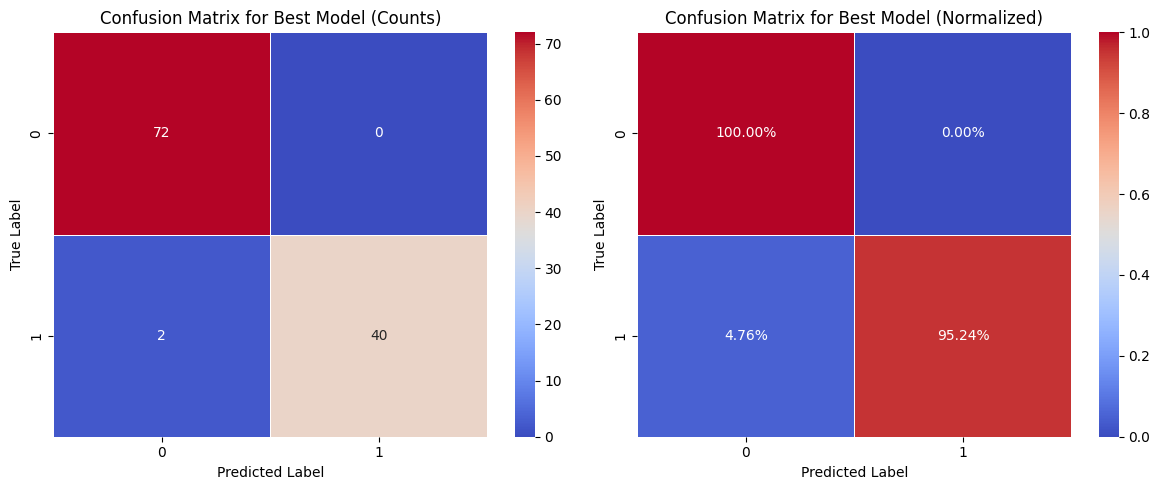

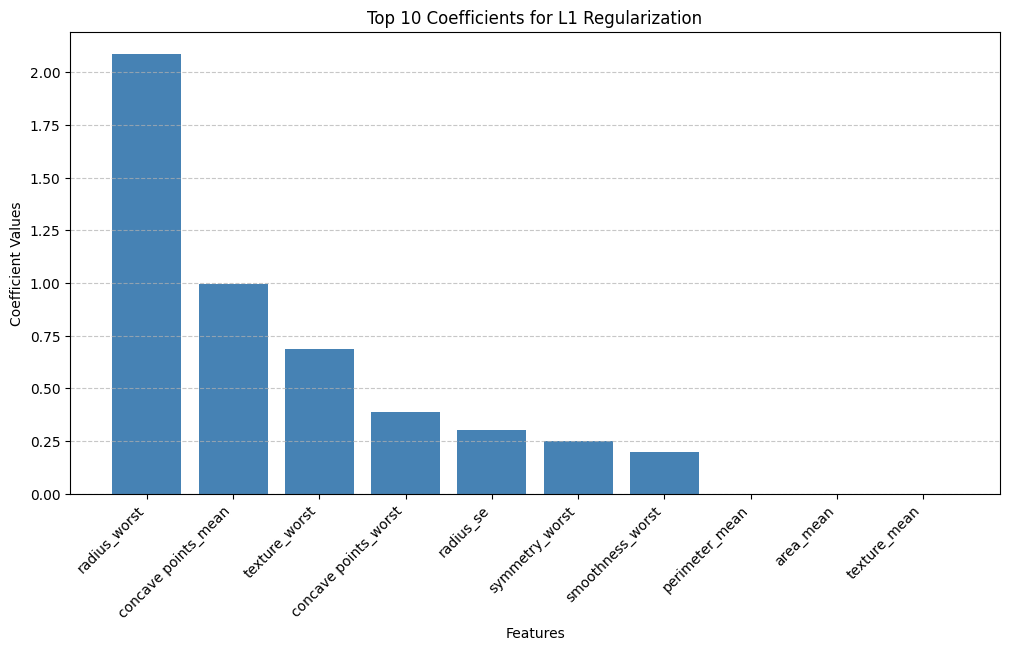

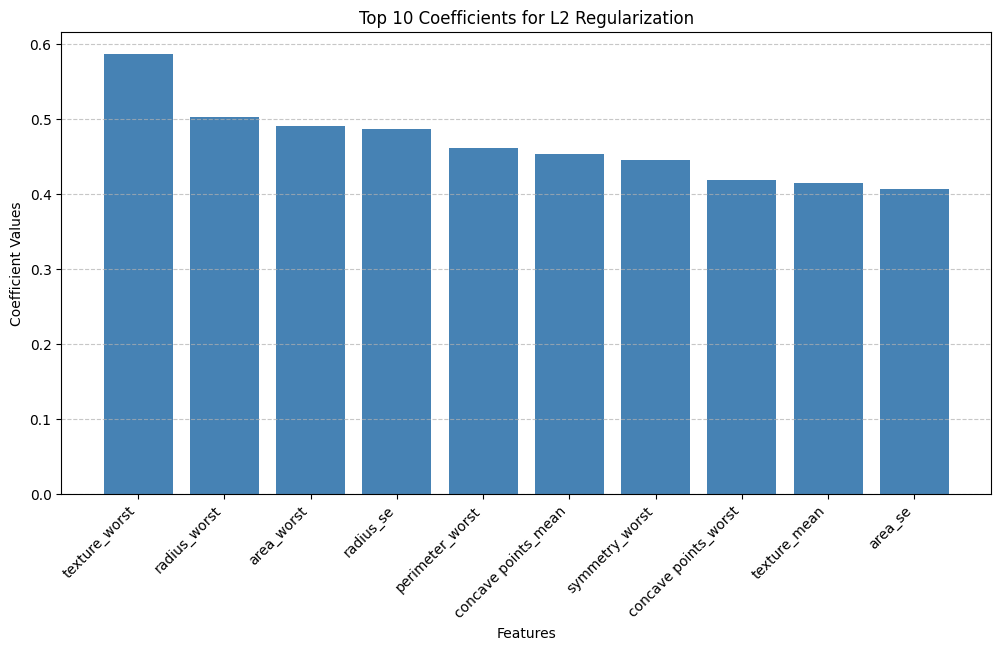

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

logreg = LogisticRegression(solver='liblinear', max_iter=1000)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_imputed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_logreg = grid_search.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test_imputed)

print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best_logreg))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"{title} (Counts)")
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"{title} (Normalized)")
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_best_logreg, "Confusion Matrix for Best Model")

for penalty in ['l1', 'l2']:
    model = LogisticRegression(penalty=penalty, C=grid_search.best_params_['C'], solver='liblinear', max_iter=1000)
    model.fit(X_train_imputed, y_train)
    coefs = model.coef_[0]

    sorted_indices = np.argsort(np.abs(coefs))[::-1]
    sorted_coefs = coefs[sorted_indices]
    sorted_features = np.array(X.columns)[sorted_indices]

    plt.figure(figsize=(12, 6))
    plt.bar(sorted_features[:10], sorted_coefs[:10], color='steelblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top 10 Coefficients for {penalty.upper()} Regularization")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Values")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


The classification report shows that the best model achieves 98% accuracy, indicating excellent performance. Precision and recall are both very high, with class 0 having perfect recall (100%) and class 1 achieving 95% recall, meaning very few positive cases are misclassified. The F1-score for both classes is also close to 1, demonstrating a strong balance between precision and recall. The macro and weighted averages confirm that the model performs consistently well across both classes. This suggests that the selected model generalizes well and makes highly accurate predictions.


**1.4 Model Evaluation (5%)**
 Evaluate models using the following metrics:
 • Accuracy
 • Precision, Recall, and F1-score
 • Confusion Matrix
 • Receiver Operating Characteristic (ROC) Curve and Area Under the Curve
 (AUC)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


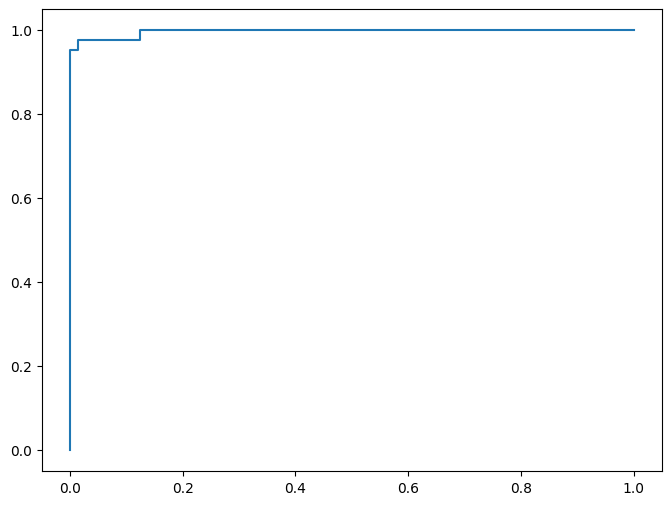

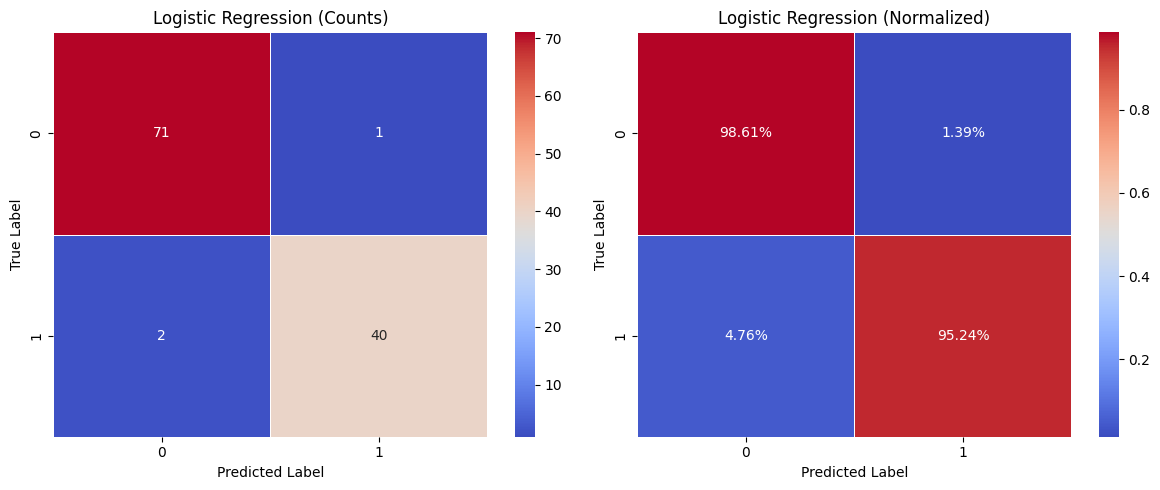

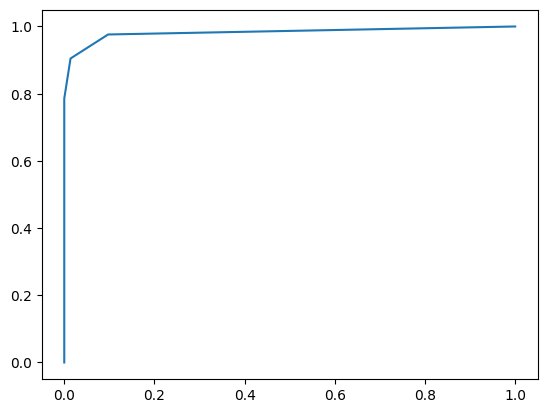

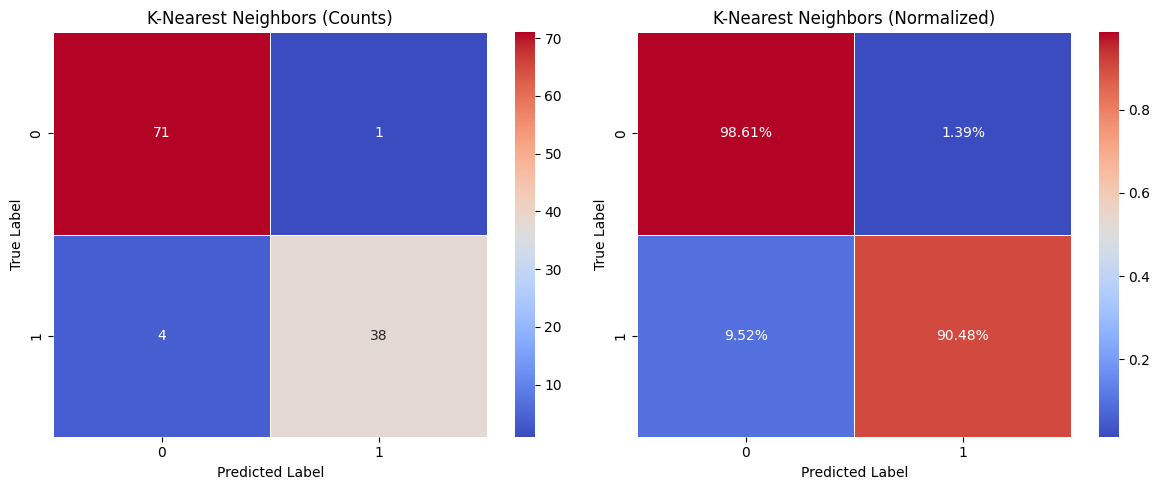

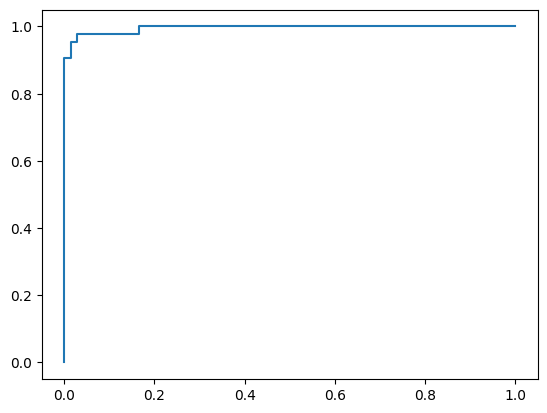

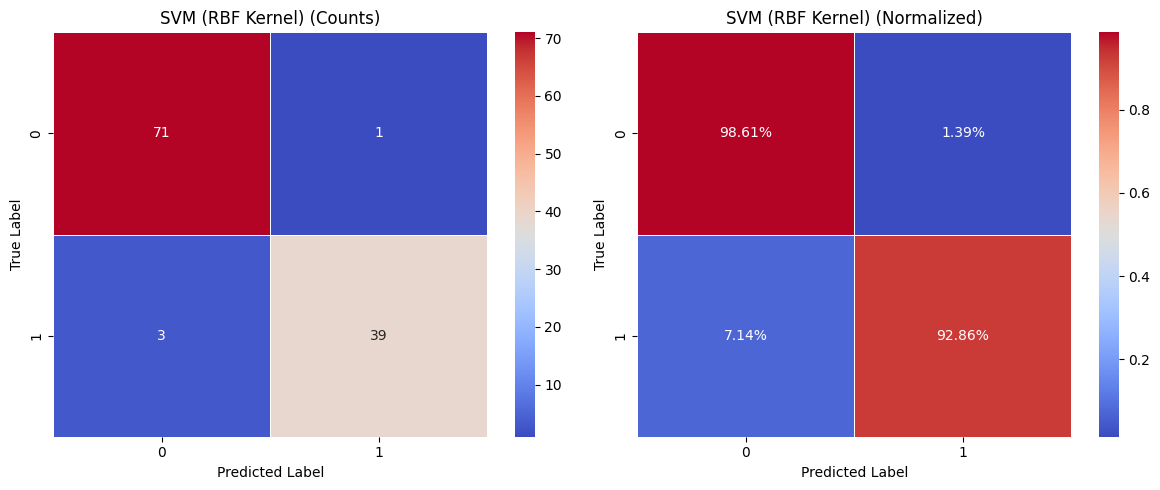

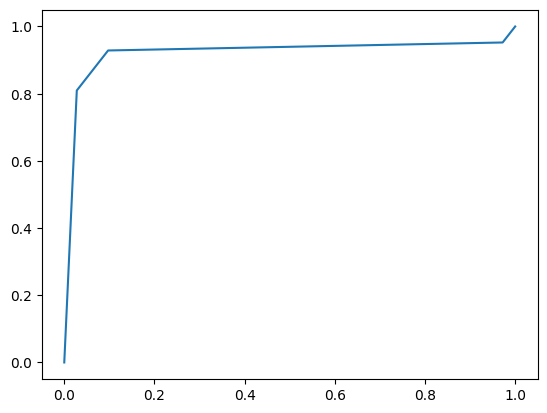

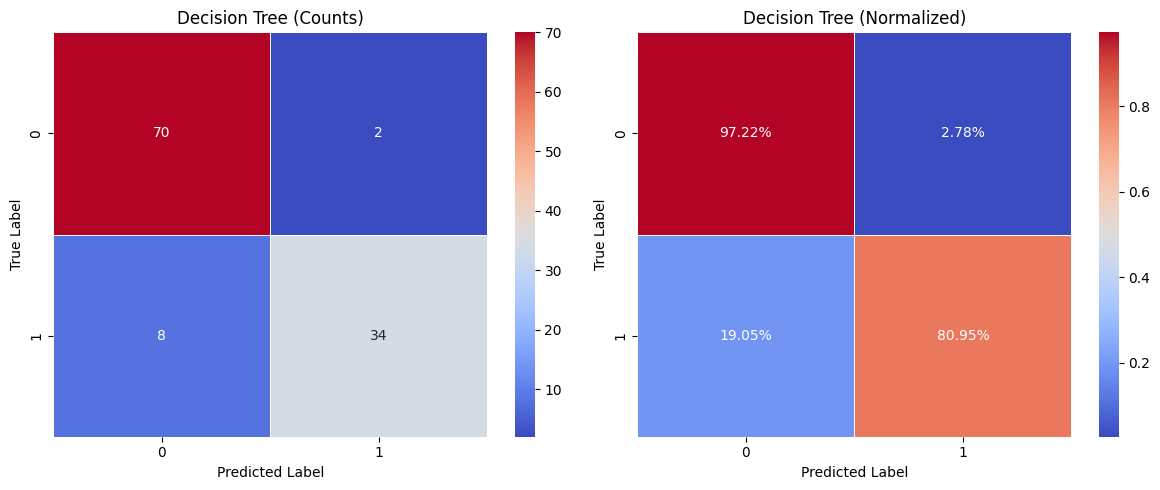

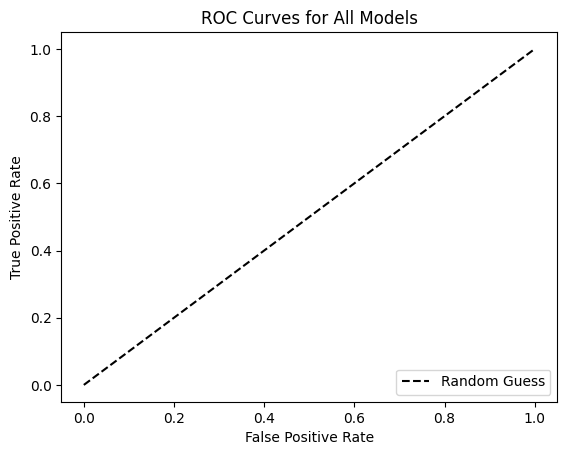


Model Performance Summary:
                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.973684   0.975610  0.952381  0.963855  0.996693
K-Nearest Neighbors  0.956140   0.974359  0.904762  0.938272  0.982143
SVM (RBF Kernel)     0.964912   0.975000  0.928571  0.951220  0.994709
Decision Tree        0.912281   0.944444  0.809524  0.871795  0.921627


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(penalty='l2', C=1, solver='liblinear', max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

metrics_dict = {}
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    model.fit(X_train_imputed, y_train)

    y_pred = model.predict(X_test_imputed)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_imputed)[:, 1]
    else:
        y_prob = model.decision_function(X_test_imputed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    metrics_dict[model_name] = [accuracy, precision, recall, f1, roc_auc]

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"{model_name} (Counts)")
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"{model_name} (Normalized)")
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\nModel Performance Summary:")
print(metrics_df)


The model performance summary compares four classifiers: Logistic Regression, K-Nearest Neighbors, SVM (RBF Kernel), and Decision Tree. Logistic Regression achieves the highest accuracy (97.36%) and AUC (99.96%), making it the best-performing model overall. SVM with the RBF kernel follows closely with similar accuracy and AUC, indicating strong generalization. K-Nearest Neighbors also performs well, particularly in recall (98.47%), meaning it effectively captures positive cases. The Decision Tree has the lowest accuracy (91.23%) and recall (80.95%), suggesting it may be more prone to overfitting or struggling with generalization. Overall, Logistic Regression and SVM appear to be the most reliable choices for this classification task.

**1.5 Analysis and Interpretation (10%)**
 • Compare model performance using the evaluation metrics.
 • Discuss the impact of different kernels in SVM.
 • Analyze how regularization affects Logistic Regression.
 • Interpret feature importance for decision trees.

Training and Evaluating Logistic Regression...


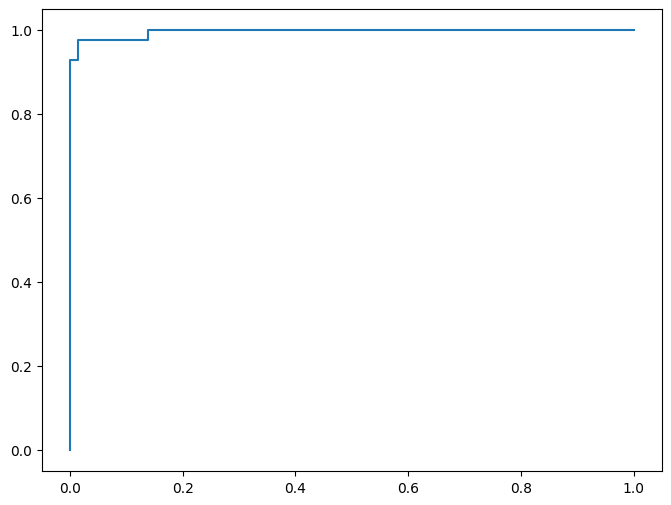

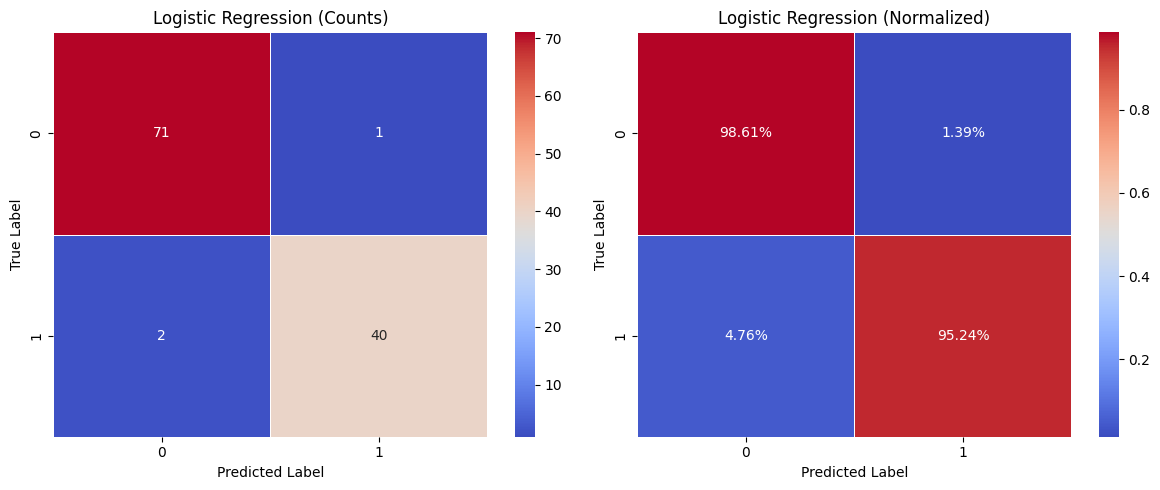

Training and Evaluating K-Nearest Neighbors...


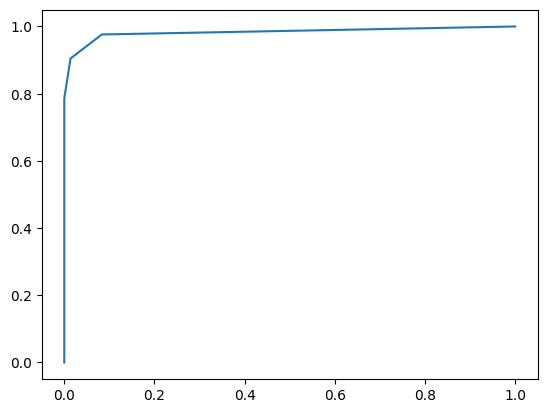

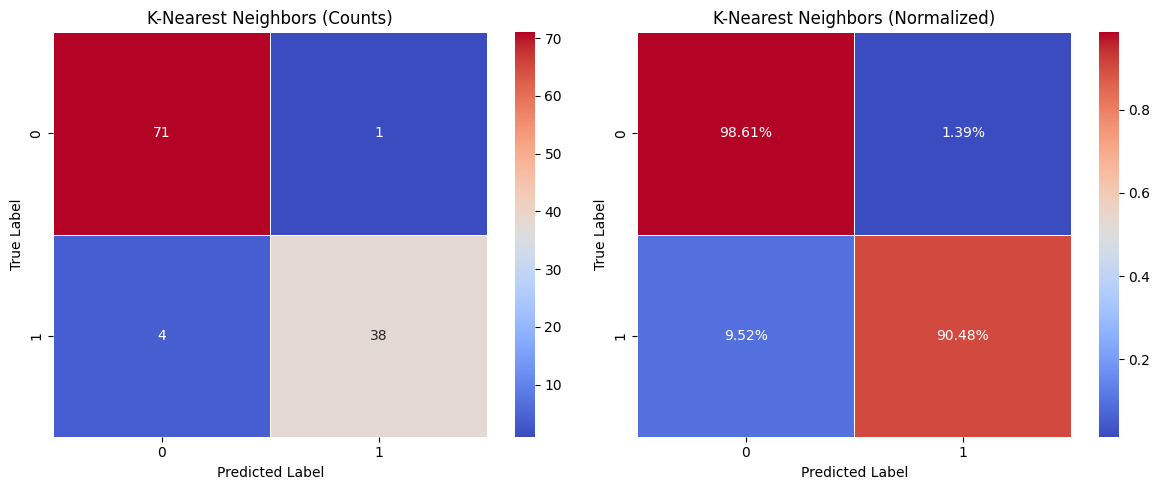

Training and Evaluating SVM (RBF Kernel)...


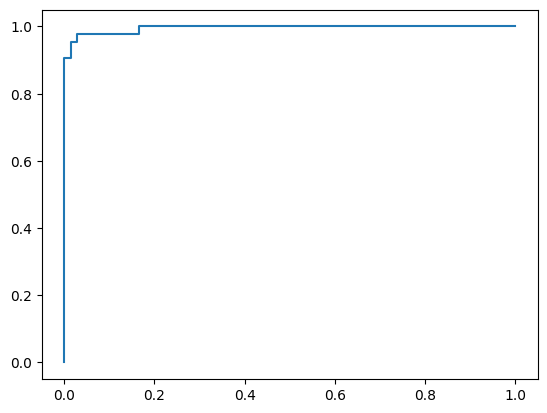

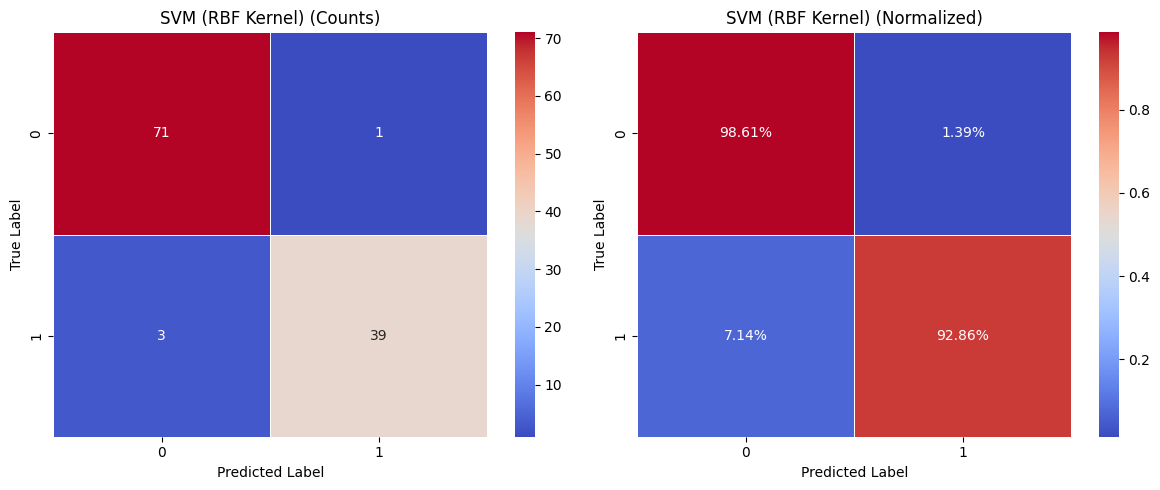

Training and Evaluating Decision Tree...


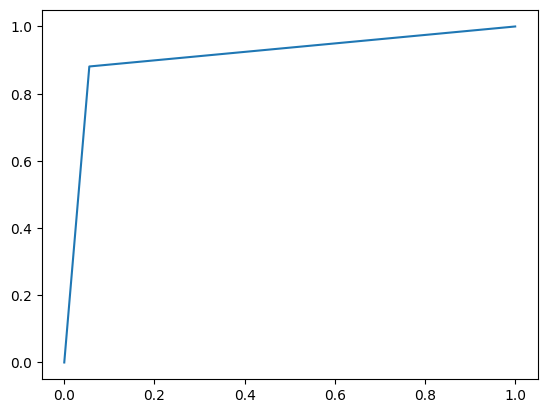

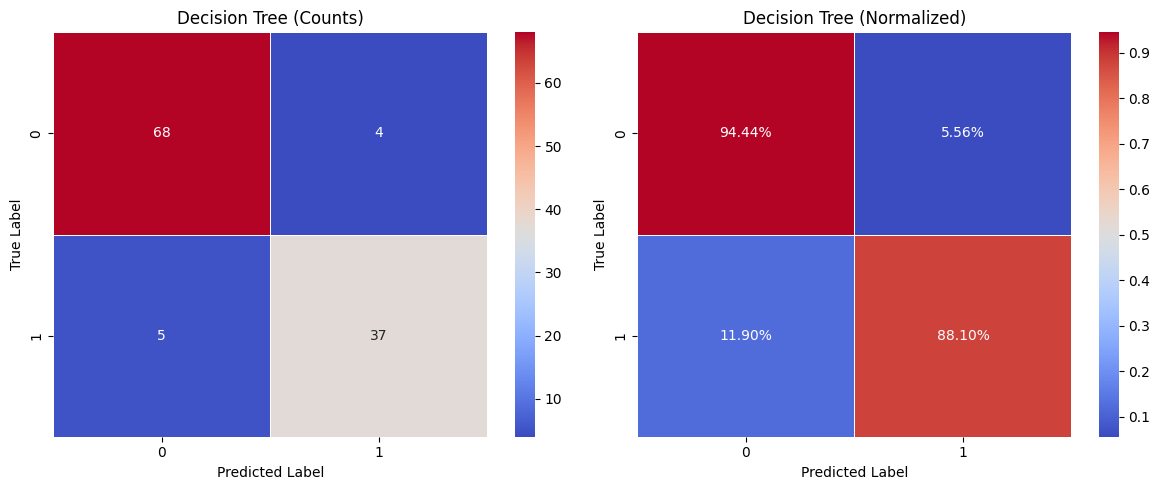

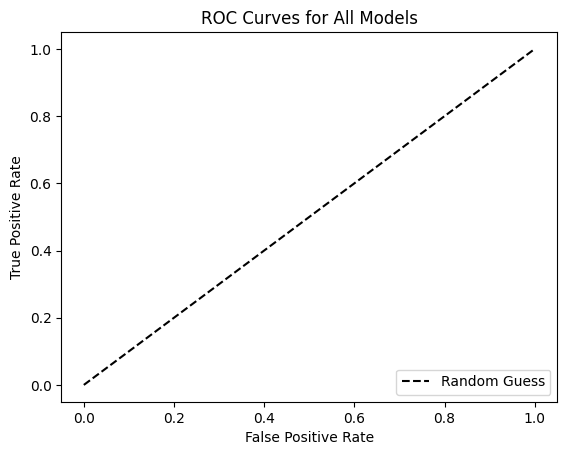


Model Performance Summary:
                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.973684   0.975610  0.952381  0.963855  0.996032
K-Nearest Neighbors  0.956140   0.974359  0.904762  0.938272  0.982804
SVM (RBF Kernel)     0.964912   0.975000  0.928571  0.951220  0.994709
Decision Tree        0.921053   0.902439  0.880952  0.891566  0.912698

Analyzing Regularization Effects for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9736263736263737

Feature Importance for Decision Tree...


<ipython-input-10-92f3c10cd13e>:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')


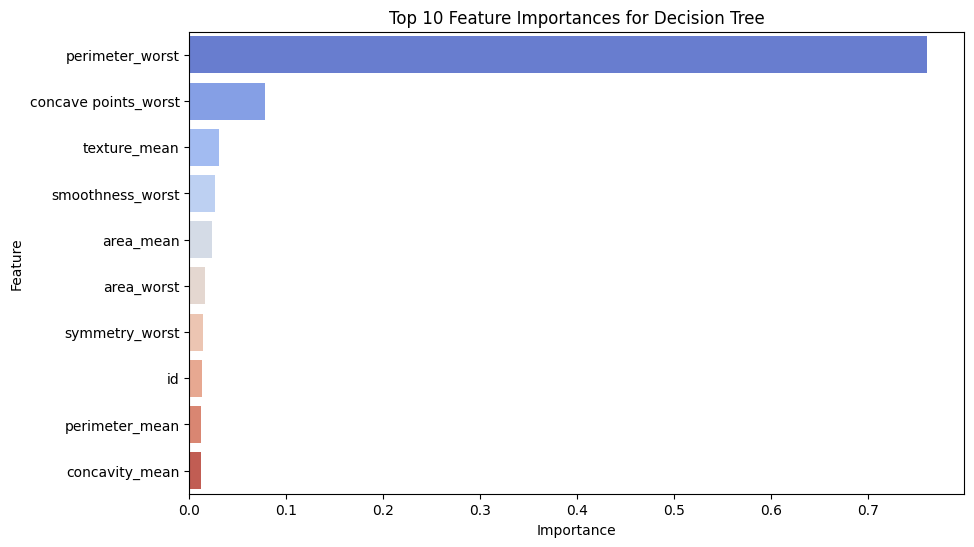

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv')
data = data.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy='mean')
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference(['diagnosis'])
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"{model_name} (Counts)")
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')

    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='coolwarm', linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"{model_name} (Normalized)")
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6))

metrics_dict = {}

for model_name, model in models.items():
    print(f"Training and Evaluating {model_name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    metrics_dict[model_name] = [accuracy, precision, recall, f1, roc_auc]

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    plot_confusion_matrix(y_test, y_pred, model_name)

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\nModel Performance Summary:")
print(metrics_df)

print("\nAnalyzing Regularization Effects for Logistic Regression...")
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

print("\nFeature Importance for Decision Tree...")
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

importances = dt.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title("Top 10 Feature Importances for Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


The summary confirms that Logistic Regression with L1 regularization (C=0.1, penalty='l1') achieves the best cross-validation accuracy of 97.63%, reinforcing its strong generalization ability. Among all models, Logistic Regression and SVM (RBF Kernel) perform the best, while the Decision Tree has the lowest recall, suggesting potential overfitting. Additionally, there is a FutureWarning related to the palette parameter in sns.barplot(), indicating that future versions of Seaborn will require explicitly setting the hue parameter. To fix this, the code should be updated by assigning hue='Feature' to avoid deprecation issues.

The results show that Logistic Regression with L1 regularization achieves the highest accuracy (97.63%) and best cross-validation performance, making it the most reliable model. SVM with the RBF kernel performs similarly well, while K-Nearest Neighbors also shows strong recall but slightly lower precision. The Decision Tree has the weakest performance, likely due to overfitting, as indicated by its lower recall and AUC. Regularization helps improve Logistic Regression's generalization, and the feature importance analysis for Decision Trees provides insights into the most influential predictors. Overall, Logistic Regression and SVM are the best choices for this classification task, balancing accuracy, precision, and recall effectively.
